<a href="https://colab.research.google.com/github/Ruy8/Ruy8/blob/main/IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Datos
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from scipy import stats
import random as rnd

Precios históricos por 5 años del IPC (desde 01/02/2018 hasta 31/12/2023)

In [ ]:
bd = pd.read_csv("^MXX.csv")
bd

In [3]:
cierre = list()
for i in range(1259):
  cierre.append(bd.Close[i])

In [4]:
rendimientos = list()
for i in range(1,1259):
  rendimientos.append(np.log(cierre[i]/cierre[i-1]))

In [5]:
media = np.mean(rendimientos)
desviación = np.std(rendimientos)
print("La media de los rendimientos es: ", media)
print("La desviación estándar de los rendimientos es: ", desviación)

La media de los rendimientos es:  6.0097484423805686e-05
La desviación estándar de los rendimientos es:  0.011107013526775063


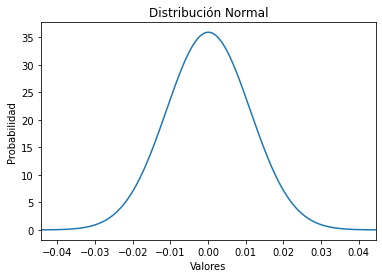

In [17]:
historico = stats.norm(media, desviación)
x = np.linspace(historico.ppf(0.00001),historico.ppf(0.99999),1000000)
fdp = historico.pdf(x)
plt.plot(x,fdp)
plt.title("Distribución Normal")
plt.ylabel("Probabilidad")
plt.xlabel("Valores")
plt.xlim(media-(desviación*4),media+(desviación*4))
plt.show()

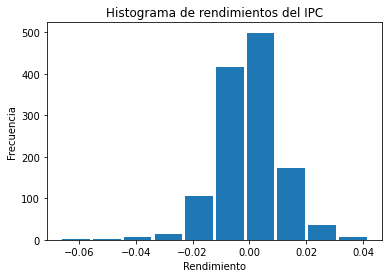

In [18]:
Rango = max(rendimientos) - min(rendimientos)
Clase = 1258**(1/3)
Tamaño = Rango/Clase
plt.hist(rendimientos, rwidth = 0.9)
plt.title("Histograma de rendimientos del IPC")
plt.xlabel("Rendimiento")
plt.ylabel("Frecuencia")
plt.show()

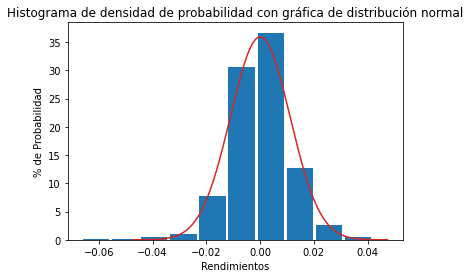

In [22]:
ax = plt.subplot()

ax.hist(rendimientos, rwidth = 0.9, density = True)
ax.plot(x,fdp, color = "tab:red")
plt.title("Histograma de densidad de probabilidad con gráfica de distribución normal")
plt.xlabel("Rendimientos")
plt.ylabel("% de Probabilidad")
plt.show()

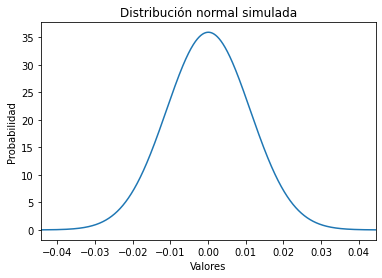

In [8]:
rs = list()
for i in range(1258):
  rs.append(rnd.gauss(media, desviación))
simulado = stats.norm(media, desviación)
x = np.linspace(simulado.ppf(0.000001), simulado.ppf(0.999999), 1000000)
fdp = simulado.pdf(x)
plt.plot(x,fdp)
plt.title("Distribución normal simulada")
plt.ylabel("Probabilidad")
plt.xlabel("Valores")
plt.xlim(media-(desviación*4),media+(desviación*4))
plt.show()

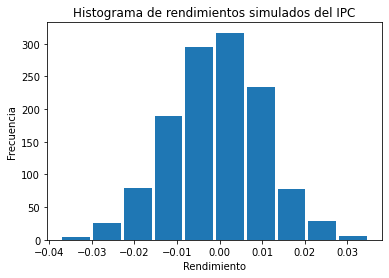

In [9]:
plt.hist(rs,rwidth=0.9)
plt.title("Histograma de rendimientos simulados del IPC")
plt.xlabel("Rendimiento")
plt.ylabel("Frecuencia")
plt.show()

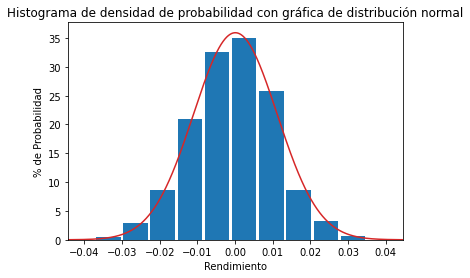

In [14]:
ax = plt.subplot()

ax.hist(rs,rwidth=0.9, density = True)
ax.plot(x,fdp, color = "tab:red")
plt.title("Histograma de densidad de probabilidad con gráfica de distribución normal")
plt.xlabel("Rendimiento")
plt.ylabel("% de Probabilidad")
plt.xlim(media-(desviación*4),media+(desviación*4))
plt.show()